<a href="https://colab.research.google.com/github/limeng1011/ClassificationwithAffairDataset_112822/blob/main/ClassificationwithAffairDataset_112822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Math
import math

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

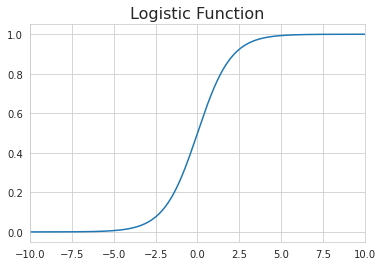

In [ ]:
# A graph of the logistic function
def logistic(t):
  return 1/(1+np.exp(-t))

x = np.linspace(-10,10,num=1000)

plt.plot(x, logistic(x))
plt.title('Logistic Function', fontsize=16)
plt.xlim(-10,10)
plt.show()

In [ ]:
# The source of the affairs dataset
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [ ]:
# Description of the dataset
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [ ]:
# Create a Dataframe to save affair dataset
df = sm.datasets.fair.load_pandas().data

In [ ]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [ ]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [ ]:
# Check if there is NA type
df.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [ ]:
# Add a column
def is_affair(t):
  if t > 0:
    return 1
  elif t == 0:
    return 0

df['had_affair'] = df['affairs'].apply(is_affair)

In [ ]:
df.groupby('had_affair').mean()
# It seems rating of marriage, years of marriage, number of children, how religious you are all impact on chance of affairs.

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


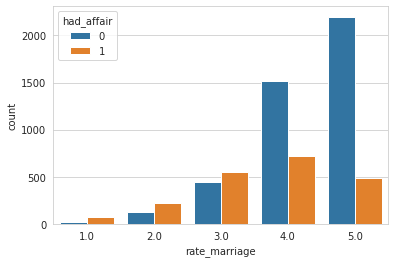

In [ ]:
# Rating of marriage vs had affair or not, one woud think there is a connection
sns.countplot(df['rate_marriage'],
              hue = df['had_affair'])

In [ ]:
df_rate_hadaffair = df[df['had_affair']==0].groupby('rate_marriage', as_index=False).count()[['rate_marriage', 'had_affair']]

In [ ]:
df_rate_noaffair = df[df['had_affair']==1].groupby('rate_marriage', as_index=False).count()[['rate_marriage', 'had_affair']]

In [ ]:
df_rate_hadaffair

,rate_marriage,had_affair
0,1.0,25
1,2.0,127
2,3.0,446
3,4.0,1518
4,5.0,2197


In [ ]:
df_rate_noaffair

,rate_marriage,had_affair
0,1.0,74
1,2.0,221
2,3.0,547
3,4.0,724
4,5.0,487


In [ ]:
df_rate_affair = df_rate_noaffair.join(df_rate_hadaffair.set_index('rate_marriage'), on='rate_marriage', lsuffix='_no', rsuffix='_yes')

In [ ]:
df_rate_affair ['no_to_yes_ratio'] = df_rate_affair['had_affair_no']/df_rate_affair['had_affair_yes']

In [ ]:
df_rate_affair

,rate_marriage,had_affair_no,had_affair_yes,no_to_yes_ratio
0,1.0,74,25,2.960000
1,2.0,221,127,1.740157
2,3.0,547,446,1.226457
3,4.0,724,1518,0.476943
4,5.0,487,2197,0.221666


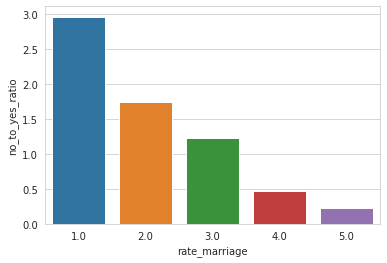

In [ ]:
# There is a strong correlation between rate of marriage to having affairs or not
sns.barplot(data = df_rate_affair,
            x = 'rate_marriage',
            y = 'no_to_yes_ratio')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


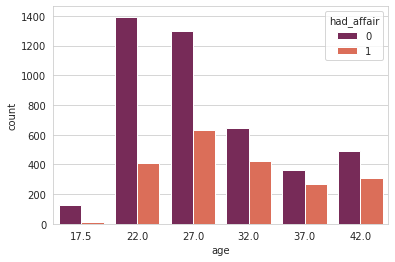

In [ ]:
# The impact of age on having affair or not
# df.groupby(['age']).count()
sns.countplot(df['age'],
              hue = df['had_affair'],
              palette = 'rocket')

In [ ]:
df_years_affair = pd.pivot_table(df, values='rate_marriage', index=['yrs_married'], columns=['had_affair'], aggfunc=np.count_nonzero)

In [ ]:
df_years_affair.columns = ['no_affair', 'had_affair']

In [ ]:
df_years_affair['no_to_yes_ratio'] = df_years_affair['no_affair']/df_years_affair['had_affair']

In [ ]:
df_years_affair

,no_affair,had_affair,no_to_yes_ratio
yrs_married,,,
0.5,354,16,22.125000
2.5,1595,439,3.633257
6.0,754,387,1.948320
9.0,348,254,1.370079
13.0,347,243,1.427984
16.5,449,369,1.216802
23.0,466,345,1.350725


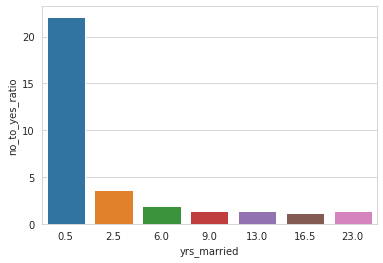

In [ ]:
# Newly weds do not have much affair, probably make sense?
sns.barplot(data = df_years_affair,
            x = df_years_affair.index,
            y = 'no_to_yes_ratio')

In [ ]:
df.groupby(['age','had_affair']).count()

rate_marriage  yrs_married  children  religious  educ  \
age  had_affair                                                          
17.5 0                     126          126       126        126   126   
     1                      13           13        13         13    13   
22.0 0                    1394         1394      1394       1394  1394   
     1                     406          406       406        406   406   
27.0 0                    1298         1298      1298       1298  1298   
     1                     633          633       633        633   633   
32.0 0                     644          644       644        644   644   
     1                     425          425       425        425   425   
37.0 0                     364          364       364        364   364   
     1                     270          270       270        270   270   
42.0 0                     487          487       487        487   487   
     1                     306          306       306        306   306   

                 occupation  occupation_husb  affairs  
age  had_affair                                        
17.5 0                  126              126      126  
     1                   13               13       13  
22.0 0                 1394             1394     1394  
     1                  406              406      406  
27.0 0                 1298             1298     1298  
     1                  633              633      633  
32.0 0                  644              644      644  
     1                  425              425      425  
37.0 0                  364              364      364  
     1                  270              270      270  
42.0 0                  487              487      487  
     1                  306              306      306

In [ ]:
# What about age?


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


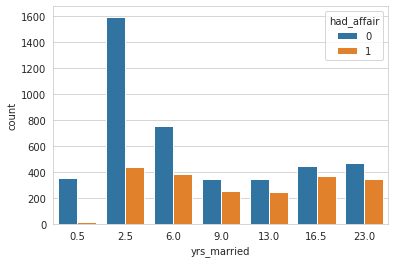

In [ ]:
# Years of marriage vs having affair or not
sns.countplot(df['yrs_married'],
              hue = df['had_affair'])

In [ ]:
df_age_affair = pd.pivot_table(data=df, values='yrs_married', index=['had_affair'], columns=['age'], aggfunc=np.count_nonzero)

In [ ]:
df_age_affair

age,17.5,22.0,27.0,32.0,37.0,42.0
had_affair,,,,,,
0,126,1394,1298,644,364,487
1,13,406,633,425,270,306


In [ ]:
df_age_affair = pd.pivot_table(data=df, values='yrs_married', index=['age'], columns=['had_affair'], aggfunc=np.count_nonzero)

In [ ]:
df_age_affair.columns = ['no_affair','had_affair']
df_age_affair['no_to_yes_ratio'] = df_age_affair['no_affair']/df_age_affair['had_affair']

In [ ]:
df_age_affair

,no_affair,had_affair,no_to_yes_ratio
age,,,
17.5,126,13,9.692308
22.0,1394,406,3.433498
27.0,1298,633,2.050553
32.0,644,425,1.515294
37.0,364,270,1.348148
42.0,487,306,1.591503


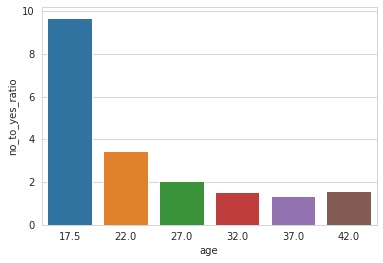

In [ ]:
# At younger age, there is less affairs, make sense?
sns.barplot(data = df_age_affair,
            x = df_age_affair.index,
            y = 'no_to_yes_ratio')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


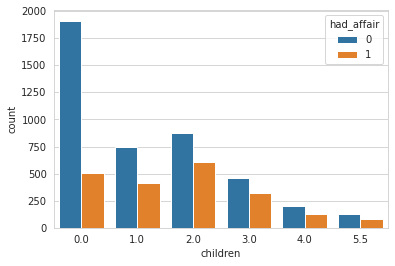

In [ ]:
# Number of children
sns.countplot(df['children'],
              hue = df['had_affair'])

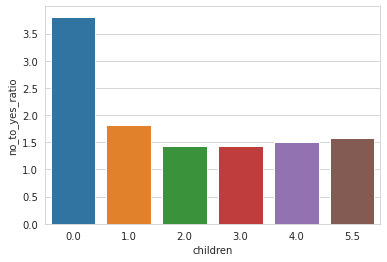

In [ ]:
# It seems people with no children at all has the lowest rate for affairs, but that may be because they are still young
df_kids_affair = pd.pivot_table(data=df, values='yrs_married', index=['children'], columns=['had_affair'], aggfunc=np.count_nonzero)
df_kids_affair.columns = ['no_affair','had_affair']
df_kids_affair['no_to_yes_ratio'] = df_kids_affair['no_affair']/df_kids_affair['had_affair']
sns.barplot(data = df_kids_affair,
            x = df_kids_affair.index,
            y = 'no_to_yes_ratio')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


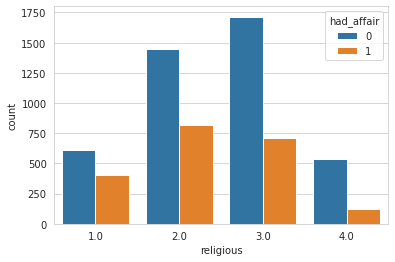

In [ ]:
# How religious vs having affair or not
sns.countplot(df['religious'],
              hue = df['had_affair'])

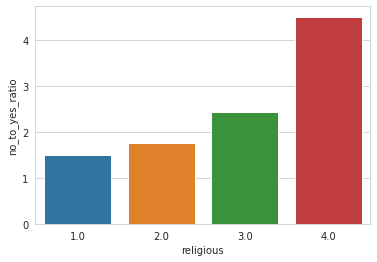

In [ ]:
# More religious people have less affairs?
df_religion_affair = pd.pivot_table(data=df, values='yrs_married', index=['religious'], columns=['had_affair'], aggfunc=np.count_nonzero)
df_religion_affair.columns = ['no_affair','had_affair']
df_religion_affair['no_to_yes_ratio'] = df_religion_affair['no_affair']/df_religion_affair['had_affair']
sns.barplot(data = df_religion_affair,
            x = df_religion_affair.index,
            y = 'no_to_yes_ratio')

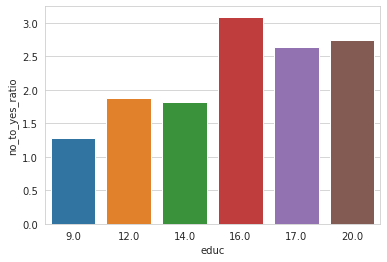

In [ ]:
# More educated people have less affairs?
df_educ_affair = pd.pivot_table(data=df, values='yrs_married', index=['educ'], columns=['had_affair'], aggfunc=np.count_nonzero)
df_educ_affair.columns = ['no_affair','had_affair']
df_educ_affair['no_to_yes_ratio'] = df_educ_affair['no_affair']/df_educ_affair['had_affair']
sns.barplot(data = df_educ_affair,
            x = df_educ_affair.index,
            y = 'no_to_yes_ratio')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


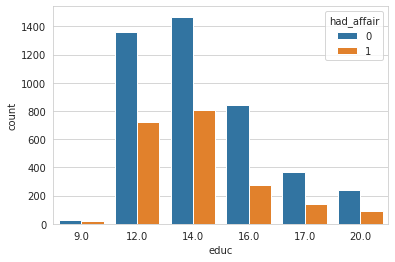

In [ ]:
# Education
sns.countplot(df['educ'],
              hue = df['had_affair'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


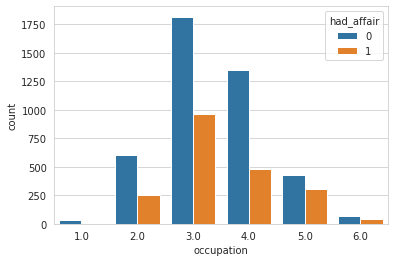

In [ ]:
# Occupation
sns.countplot(df['occupation'],
              hue = df['had_affair'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


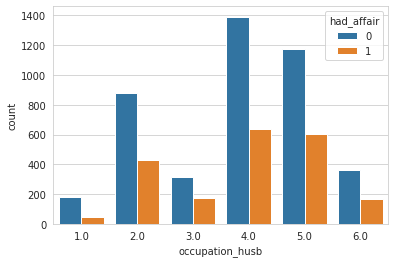

In [ ]:
# Spouse occupation
sns.countplot(df['occupation_husb'],
              hue = df['had_affair'])

In [ ]:
occupation_df = pd.get_dummies(df['occupation'], prefix='occupation')

In [ ]:
occupation_husb_df = pd.get_dummies(df['occupation_husb'], prefix='occupation_husb')

In [ ]:
df = pd.concat([df, occupation_df, occupation_husb_df], axis=1)

In [ ]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair,...,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,...,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,...,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,...,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,...,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
new_df = df.drop(['occupation', 'occupation_husb', 'occupation_6.0', 'occupation_husb_6.0', 'affairs'], axis=1)

In [ ]:
new_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,1,0,0,0,0,0,0,0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,0,1,0,0,0,0,0,1,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,0,1,0,0,0,0,0,0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,0,1,0,0,0,0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
target = new_df['had_affair']
features = new_df.drop('had_affair', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8)

In [ ]:
logistic_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [ ]:
logistic_reg.coef_

array([[-6.98309596e-01, -5.86251541e-02,  1.03762326e-01,
         1.88418189e-02, -3.79025515e-01, -3.26579275e-04,
        -8.53752658e-01, -6.00774035e-01, -2.82091365e-01,
        -5.59717685e-01,  4.57939446e-02, -9.07922734e-02,
         1.04350405e-03,  1.13759588e-01,  2.86918351e-02,
         3.91820445e-02]])

In [ ]:
# Accuracy with the training dataset
logistic_reg.score(X_train, y_train)

0.7238805970149254

In [ ]:
# Accuracy with the testing dataset
logistic_reg.score(X_test, y_test)

0.7323390894819466

In [ ]:
# Accuracy with the training dataset using metrics
metrics.accuracy_score(y_train, logistic_reg.predict(X_train))

0.7238805970149254

In [ ]:
# Accuracy with the testing dataset using metrics
metrics.accuracy_score(y_test, logistic_reg.predict(X_test))

0.7323390894819466

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [ ]:
knc.score(X_train, y_train)

0.744304791830322

In [ ]:
knc.score(X_test, y_test)

0.7205651491365777

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
gnb.score(X_train, y_train)

0.6741948153967007

In [ ]:
gnb.score(X_test, y_test)

0.6711145996860283

In [ ]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

In [ ]:
svc.score(X_train, y_train)

0.7089552238805971

In [ ]:
svc.score(X_test, y_test)

0.7189952904238619

In [ ]:
# Make a dataframe to store the results
# neutral network
df_accuracy = DataFrame({'Classification Model':['Logistic Regression', 'K Nearest Neighbor', 'Naive Eyes', 'Support Vector Machine', 'Random Forest Classification'],
                         'Accuracy in train dataset':[logistic_reg.score(X_train, y_train), knc.score(X_train, y_train), gnb.score(X_train, y_train), svc.score(X_train, y_train), rfc.score(X_train, y_train)],
                         'Accuracy in test dataset':[logistic_reg.score(X_test, y_test), knc.score(X_test, y_test), gnb.score(X_test, y_test), svc.score(X_test, y_test), rfc.score(X_test, y_test)]
    
})

In [ ]:
df_accuracy

,Classification Model,Accuracy in train dataset,Accuracy in test dataset
0,Logistic Regression,0.723881,0.732339
1,K Nearest Neighbor,0.744305,0.720565
2,Naive Eyes,0.674195,0.671115
3,Support Vector Machine,0.708955,0.718995
4,Random Forest Classification,0.943244,0.699372


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

In [ ]:
rfc.score(X_train, y_train)

0.9432443047918303

In [ ]:
rfc.score(X_test, y_test)

0.6993720565149136